In [1]:
import torch

# Verificar si CUDA está disponible
if torch.cuda.is_available():
    print("CUDA disponible")
    device = torch.device("cuda")
else:
    print("CUDA no está disponible, se usará CPU")
    device = torch.device("cpu")

CUDA disponible


In [2]:
from transformers import YolosForObjectDetection, YolosImageProcessor

# Cargar modelo y procesador preentrenado
model = YolosForObjectDetection.from_pretrained("hustvl/yolos-base")

model = model.to(device)

processor = YolosImageProcessor.from_pretrained("hustvl/yolos-base")


/home/rusanrod/.local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
from torch import nn

# Reemplazar la capa de clasificación con el nuevo número de clases
num_new_classes = 10
model.class_labels_classifier = nn.Linear(model.config.hidden_size, num_new_classes)


In [3]:
from PIL import Image
import torch

# Cargar una imagen
image = Image.open("../Descargas/img2.jpg").convert("RGB")


# Preprocesar la imagen y realizar predicción
inputs = processor(images=image, return_tensors="pt")

# Mover los tensores a CUDA
inputs = {k: v.to(device) for k, v in inputs.items()}

with torch.no_grad():
    outputs = model(**inputs)

# Extraer predicciones
# predictions = processor.post_process_object_detection(outputs, threshold=0.5)


In [4]:
# Postprocesar resultados en la CPU
results = processor.post_process_object_detection(outputs, threshold=0.5, target_sizes=[image.size])

# Extraer cajas, etiquetas y puntuaciones
boxes = results[0]["boxes"].cpu()  # Mover a la CPU
labels = results[0]["labels"].cpu()
scores = results[0]["scores"].cpu()


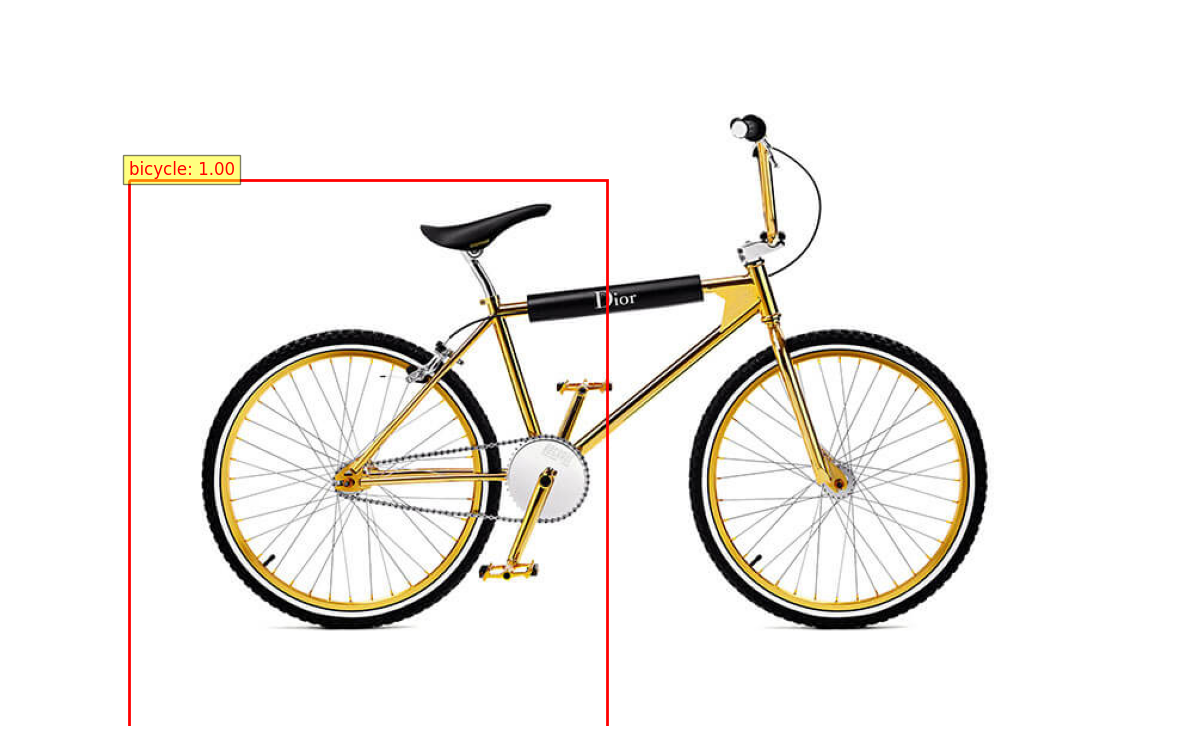

In [5]:
import matplotlib.pyplot as plt

# Visualización con Matplotlib
label_map = model.config.id2label
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.imshow(image)

# Dibujar detecciones
for box, label, score in zip(boxes, labels, scores):
    xmin, ymin, xmax, ymax = box.tolist()
    ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, edgecolor='red', fill=False, lw=2))
    ax.text(xmin, ymin - 5, f"{label_map[label.item()]}: {score:.2f}", 
            color='red', fontsize=12, bbox=dict(facecolor='yellow', alpha=0.5))

ax.axis("off")
plt.tight_layout()
plt.show()